# Hypothesis 4
Pull requests are reviewed and merged faster by an integrator from the same affiliation.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
from cliffs_delta import cliffs_delta

In [9]:
merged_data = pd.read_csv('./data/merged_data.csv', header=0)
merged_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num,log_mergetime_minutes,log_lifetime_minutes
0,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,0,0,0.0,0,0.000459,0,627,0,6.442540,6.442540
1,60,22091370,kubernetes,kubernetes,1,2760,2760.0,1,10,75,...,3,0,0.0,1,0.021057,0,2760,0,7.923348,7.923348
2,93,1486,ansible,ansible,1,4971,4971.0,4,14,0,...,6,2,64.0,0,0.000088,0,4971,0,8.511577,8.511577
3,101,5219,scikit-learn,scikit-learn,1,4040,4040.0,4,4,92,...,3,1,3.0,0,0.109291,0,4040,0,8.304247,8.304247
4,119,3905191,facebook,react,1,3609,3609.0,1,5,0,...,0,0,91.0,0,0.000000,0,3609,0,8.191463,8.191463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67652,3347524,1486,ansible,ansible,1,100,100.0,1,4,0,...,0,0,3.0,0,0.010687,0,100,0,4.615121,4.615121
67653,3347645,1486,ansible,ansible,1,487,487.0,2,8,0,...,0,0,67.0,0,0.008142,0,487,0,6.190315,6.190315
67654,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,17,3,7.0,0,0.000274,1,10204,1,11.059299,11.059299
67655,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,0,0,197.0,0,0.012812,0,11373,0,9.339085,9.339085


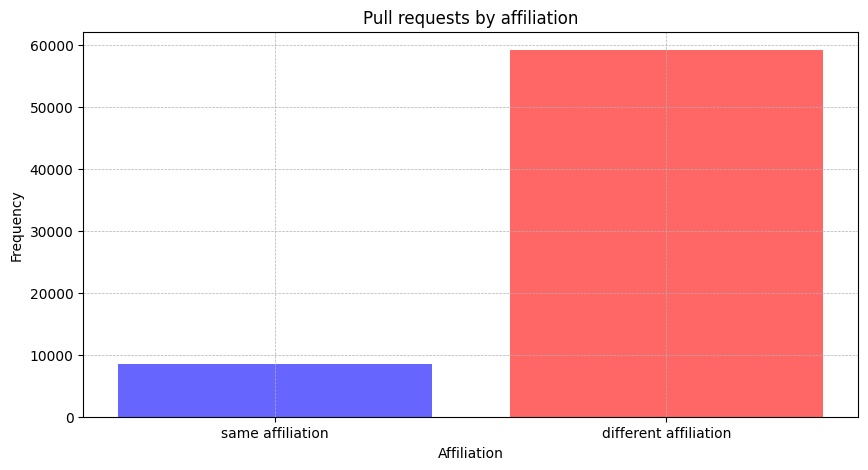

In [10]:
same_affiliation = merged_data[merged_data['contrib_affiliation'] == merged_data['inte_affiliation']]
diff_affiliation = merged_data[merged_data['contrib_affiliation'] != merged_data['inte_affiliation']]

plt.figure(figsize=(10, 5))
plt.bar(['same affiliation', 'different affiliation'], [len(same_affiliation), len(diff_affiliation)], alpha=0.6, color=['blue', 'red'])
plt.xlabel('Affiliation')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by affiliation')
plt.show()

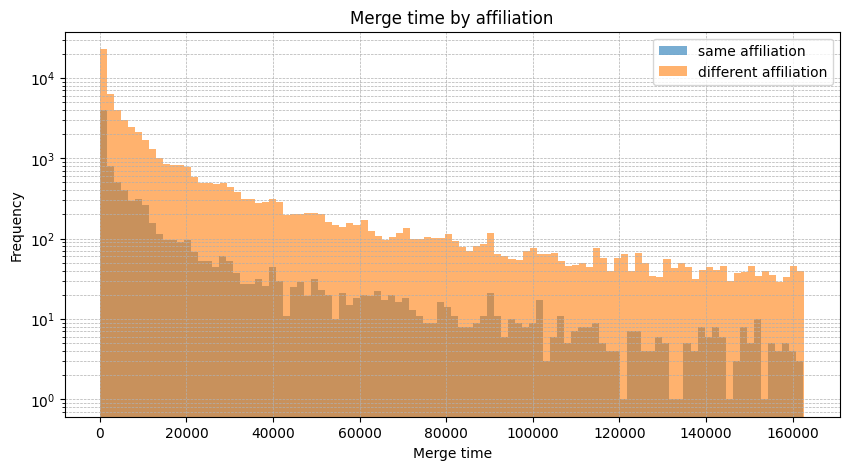

In [11]:

plt.figure(figsize=(10, 5))
plt.hist(same_affiliation['mergetime_minutes'], bins=100, alpha=0.6, label='same affiliation', log=True)
plt.hist(diff_affiliation['mergetime_minutes'], bins=100, alpha=0.6, label='different affiliation', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by affiliation')
plt.show()

In [12]:

sample_size = 5000
same_sample = same_affiliation['mergetime_minutes'].sample(n=sample_size, random_state=1)
diff_sample = diff_affiliation['mergetime_minutes'].sample(n=sample_size, random_state=1)

res_same = shapiro(same_sample)
res_diff = shapiro(diff_sample)
print('Shapiro-Wilk test for same affiliation, mergetime: W = {}, p = {}'.format(res_same.statistic, res_same.pvalue))
print('Shapiro-Wilk test for different affiliation, mergetime: W = {}, p = {}'.format(res_diff.statistic, res_diff.pvalue))

H, p = kruskal(same_affiliation['mergetime_minutes'], diff_affiliation['mergetime_minutes'])
print('Kruskal-Wallis H test, mergetime: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_affiliation['mergetime_minutes'], diff_affiliation['mergetime_minutes'])
    print('Cliff\'s delta for mergetime: delta = {}, interpretation = {}'.format(delta, res))
      
print('Mean merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].mean()))
print('Mean merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].mean()))
print('Median merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].median()))
print('Median merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].median()))
print('Standard deviation of merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].std()))
print('Standard deviation of merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].std()))
print('Maximum merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].max()))
print('Maximum merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].max()))
print('Minimum merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].min()))
print('Minimum merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].min()))

Shapiro-Wilk test for same affiliation, mergetime: W = 0.5342038505553826, p = 1.264682548215121e-78
Shapiro-Wilk test for different affiliation, mergetime: W = 0.5683458520448927, p = 5.286651300738973e-77
Kruskal-Wallis H test, mergetime: H = 262.748309027187, p = 4.31978641622202e-59
Cliff's delta for mergetime: delta = -0.10842569267952255, interpretation = negligible
Mean merge time for same affiliation: 12431.309009854529
Mean merge time for different affiliation: 14722.638729643346
Median merge time for same affiliation: 2191.5
Median merge time for different affiliation: 3469.0
Standard deviation of merge time for same affiliation: 25486.25641807592
Standard deviation of merge time for different affiliation: 27205.77485134379
Maximum merge time for same affiliation: 162415.0
Maximum merge time for different affiliation: 162737.0
Minimum merge time for same affiliation: 16.0
Minimum merge time for different affiliation: 16.0


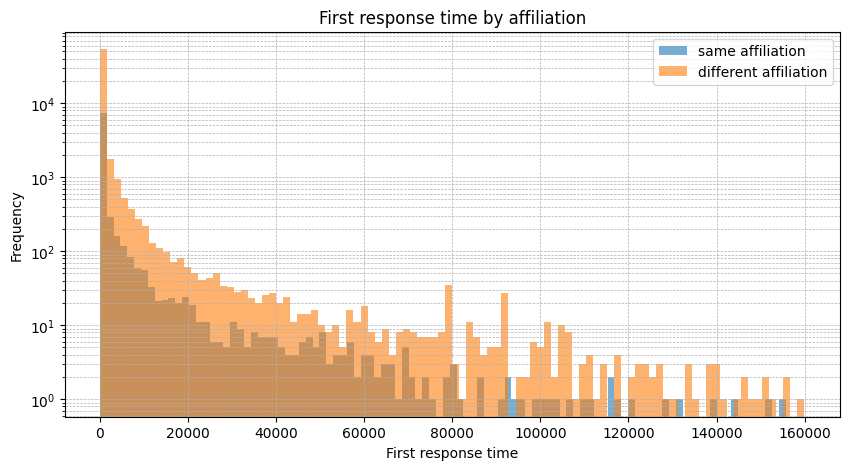

Shapiro-Wilk test for same affiliation, first response: W = 0.23973451683163838, p = 1.7976554368151484e-89
Shapiro-Wilk test for different affiliation, first response: W = 0.1544706932450668, p = 6.408109032790334e-92
Kruskal-Wallis H test, first response: H = 948.4765672481592, p = 2.8438087600304705e-208
Cliff's delta for first response: delta = 0.20401058989239498, interpretation = small
Mean first response time for same affiliation: 2123.8487799155328
Mean first response time for different affiliation: 1345.9696446992373
Median first response time for same affiliation: 31.0
Median first response time for different affiliation: 10.0
Standard deviation of first response time for same affiliation: 9277.488995391614
Standard deviation of first response time for different affiliation: 7606.116704655618
Maximum first response time for same affiliation: 155744.0
Maximum first response time for different affiliation: 159948.0


In [13]:

plt.figure(figsize=(10, 5))
plt.hist(same_affiliation['first_response_time'], bins=100, alpha=0.6, label='same affiliation', log=True)
plt.hist(diff_affiliation['first_response_time'], bins=100, alpha=0.6, label='different affiliation', log=True)
plt.xlabel('First response time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time by affiliation')
plt.show()

sample_size = 5000
same_sample = same_affiliation['first_response_time'].dropna().sample(n=sample_size, random_state=1)
diff_sample = diff_affiliation['first_response_time'].dropna().sample(n=sample_size,random_state=1)

res_same = shapiro(same_sample)
res_diff = shapiro(diff_sample)
print('Shapiro-Wilk test for same affiliation, first response: W = {}, p = {}'.format(res_same.statistic, res_same.pvalue))
print('Shapiro-Wilk test for different affiliation, first response: W = {}, p = {}'.format(res_diff.statistic, res_diff.pvalue))

H, p = kruskal(same_affiliation['first_response_time'].dropna(), diff_affiliation['first_response_time'].dropna())
print('Kruskal-Wallis H test, first response: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_affiliation['first_response_time'].dropna(), diff_affiliation['first_response_time'].dropna())   
    print('Cliff\'s delta for first response: delta = {}, interpretation = {}'.format(delta, res))

print('Mean first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].mean()))
print('Mean first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].mean()))
print('Median first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].median()))
print('Median first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].median()))
print('Standard deviation of first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].std()))
print('Standard deviation of first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].std()))
print('Maximum first response time for same affiliation: {}'.format(same_affiliation['first_response_time'].max()))
print('Maximum first response time for different affiliation: {}'.format(diff_affiliation['first_response_time'].max()))

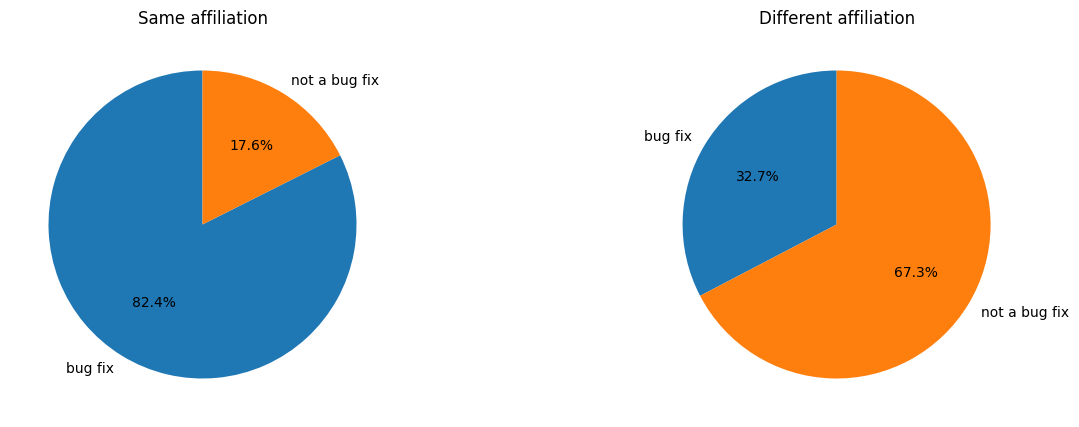

Shapiro-Wilk test for bug fix, mergetime: W = 0.5813877851891621, p = 3.541432160756518e-21
Shapiro-Wilk test for not a bug fix, mergetime: W = 0.7164600170696415, p = 2.2154115479751315e-20
Kruskal-Wallis H test, mergetime: H = 13.44520320611878, p = 0.0002456334153738147
Cliff's delta for mergetime: delta = -0.20411475789961847, interpretation = small


In [24]:
bug = merged_data[merged_data['bug_fix'] == 1]
not_bug = merged_data[merged_data['bug_fix'] == 0]

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie([bug_same.size, not_bug_same.size], labels=['bug fix', 'not a bug fix'], autopct='%1.1f%%', startangle=90)
plt.title('Same affiliation')
plt.subplot(1, 2, 2)
plt.pie([bug_diff.size, not_bug_diff.size], labels=['bug fix', 'not a bug fix'], autopct='%1.1f%%', startangle=90)
plt.title('Different affiliation')
plt.show()

sample_size = 5000
res_bug = shapiro(bug['mergetime_minutes'])
res_not_bug = shapiro(not_bug['mergetime_minutes'])
print('Shapiro-Wilk test for bug fix, mergetime: W = {}, p = {}'.format(res_bug.statistic, res_bug.pvalue))
print('Shapiro-Wilk test for not a bug fix, mergetime: W = {}, p = {}'.format(res_not_bug.statistic, res_not_bug.pvalue))

H, p = kruskal(bug['mergetime_minutes'], not_bug['mergetime_minutes'])
print('Kruskal-Wallis H test, mergetime: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(bug['mergetime_minutes'], not_bug['mergetime_minutes'])
    print('Cliff\'s delta for mergetime: delta = {}, interpretation = {}'.format(delta, res))

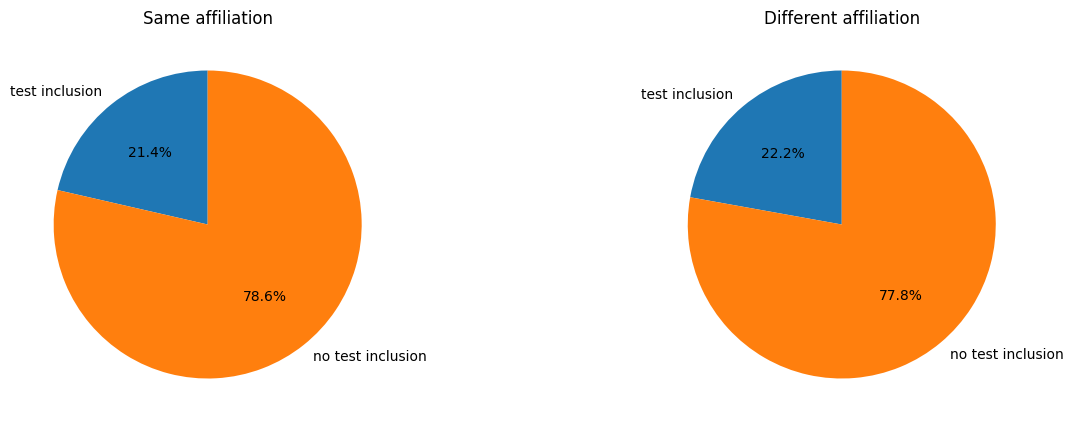

In [28]:
test_same = same_affiliation[same_affiliation['test_inclusion'] == 1]
test_diff = diff_affiliation[diff_affiliation['test_inclusion'] == 1]
no_test_same = same_affiliation[same_affiliation['test_inclusion'] == 0]
no_test_diff = diff_affiliation[diff_affiliation['test_inclusion'] == 0]

plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie([test_same.size, no_test_same.size], labels=['test inclusion', 'no test inclusion'], autopct='%1.1f%%', startangle=90)
plt.title('Same affiliation')
plt.subplot(1, 2, 2)
plt.pie([test_diff.size, no_test_diff.size], labels=['test inclusion', 'no test inclusion'], autopct='%1.1f%%', startangle=90)
plt.title('Different affiliation')
plt.show()

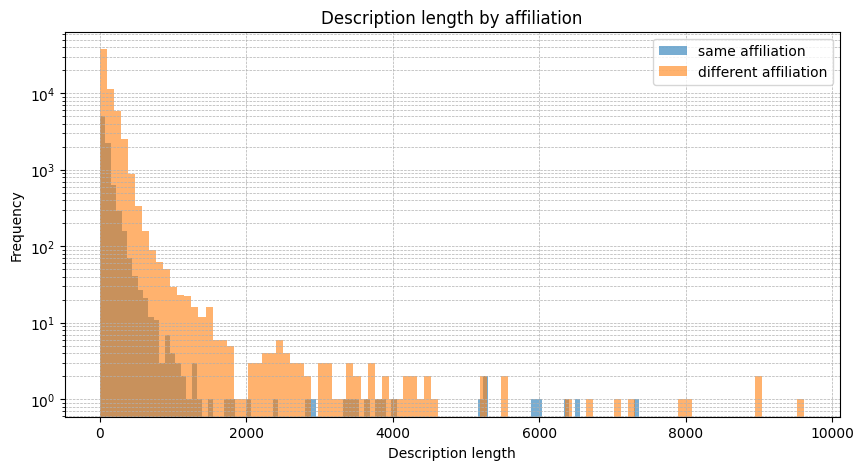

Shapiro-Wilk test for same affiliation, description length: W = 0.23274195822062993, p = 1.109639931769053e-89
Shapiro-Wilk test for different affiliation, description length: W = 0.6244823901560671, p = 4.4209826808881445e-74
Kruskal-Wallis H test, description length: H = 51.20374811553499, p = 8.325950491774436e-13
Cliff's delta for description length: delta = -0.04786343962293305, interpretation = negligible


In [27]:
plt.figure(figsize=(10, 5))
plt.hist(same_affiliation['description_length'], bins=100, alpha=0.6, label='same affiliation', log=True)
plt.hist(diff_affiliation['description_length'], bins=100, alpha=0.6, label='different affiliation', log=True)
plt.xlabel('Description length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Description length by affiliation')
plt.show()

sample_size = 5000
same_sample = same_affiliation['description_length'].sample(n=sample_size, random_state=1)
diff_sample = diff_affiliation['description_length'].sample(n=sample_size, random_state=1)

res_same = shapiro(same_sample)
res_diff = shapiro(diff_sample)
print('Shapiro-Wilk test for same affiliation, description length: W = {}, p = {}'.format(res_same.statistic, res_same.pvalue))
print('Shapiro-Wilk test for different affiliation, description length: W = {}, p = {}'.format(res_diff.statistic, res_diff.pvalue))

H, p = kruskal(same_affiliation['description_length'], diff_affiliation['description_length'])
print('Kruskal-Wallis H test, description length: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_affiliation['description_length'], diff_affiliation['description_length'])
    print('Cliff\'s delta for description length: delta = {}, interpretation = {}'.format(delta, res))

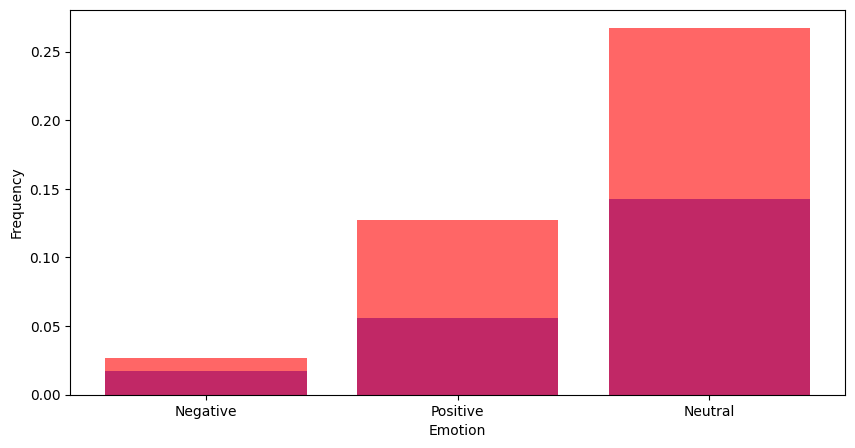

Shapiro-Wilk test for same country, negative emotion integrator: W = 0.15607834550154354, p = 7.093426865883908e-92
Shapiro-Wilk test for same county, positive emotion integrator: W = 0.29235886273550193, p = 7.720007260596895e-88
Shapiro-Wilk test for same country, neutral emotion integrator: W = 0.45557845078512393, p = 5.323497542016331e-82
Shapiro-Wilk test for different country, negative emotion integrator: W = 0.22157062415406203, p = 5.174476745549889e-90
Shapiro-Wilk test for different country, positive emotion integrator: W = 0.46116851665022274, p = 8.949841600081989e-82
Shapiro-Wilk test for different country, neutral emotion integrator: W = 0.6265198650241185, p = 5.734095326573107e-74
Kruskal-Wallis H test, negative emotion integrator: H = 120.16858386172017, p = 5.81067229132631e-28
Cliff's delta: -0.03139531486034477, interpretation: negligible
Kruskal-Wallis H test, positive emotion integrator: H = 641.6588718340574, p = 1.455995709108391e-141
Cliff's delta: -0.11482543

In [ ]:
# emotion
neg_same = same_affiliation['perc_inte_neg_emo'].dropna()
pos_same = same_affiliation['perc_inte_pos_emo'].dropna()
neu_same = same_affiliation['perc_inte_neu_emo'].dropna()

neg_diff = diff_affiliation['perc_inte_neg_emo'].dropna()
pos_diff = diff_affiliation['perc_inte_pos_emo'].dropna()
neu_diff = diff_affiliation['perc_inte_neu_emo'].dropna()


plt.figure(figsize=(10, 5))
plt.bar(['Negative', 'Positive', 'Neutral'], [neg_same.mean(), pos_same.mean(), neu_same.mean()], alpha=0.6, color='blue')
plt.bar(['Negative', 'Positive', 'Neutral'], [neg_diff.mean(), pos_diff.mean(), neu_diff.mean()], alpha=0.6, color='red')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

sample_size = 5000
same_sample_neg = neg_same.sample(n=sample_size, random_state=1)
same_sample_pos = pos_same.sample(n=sample_size, random_state=1)
same_sample_neu = neu_same.sample(n=sample_size, random_state=1)

diff_sample_neg = neg_diff.sample(n=sample_size, random_state=1)
diff_sample_pos = pos_diff.sample(n=sample_size, random_state=1)
diff_sample_neu = neu_diff.sample(n=sample_size, random_state=1)

res_same_neg = shapiro(same_sample_neg)
res_same_pos = shapiro(same_sample_pos)
res_same_neu = shapiro(same_sample_neu)

print('Shapiro-Wilk test for same country, negative emotion integrator: W = {}, p = {}'.format(res_same_neg.statistic, res_same_neg.pvalue))
print('Shapiro-Wilk test for same county, positive emotion integrator: W = {}, p = {}'.format(res_same_pos.statistic, res_same_pos.pvalue))
print('Shapiro-Wilk test for same country, neutral emotion integrator: W = {}, p = {}'.format(res_same_neu.statistic, res_same_neu.pvalue))

res_diff_neg = shapiro(diff_sample_neg)
res_diff_pos = shapiro(diff_sample_pos)
res_diff_neu = shapiro(diff_sample_neu)

print('Shapiro-Wilk test for different country, negative emotion integrator: W = {}, p = {}'.format(res_diff_neg.statistic, res_diff_neg.pvalue))
print('Shapiro-Wilk test for different country, positive emotion integrator: W = {}, p = {}'.format(res_diff_pos.statistic, res_diff_pos.pvalue))
print('Shapiro-Wilk test for different country, neutral emotion integrator: W = {}, p = {}'.format(res_diff_neu.statistic, res_diff_neu.pvalue))

H, p = kruskal(neg_same, neg_diff)
print('Kruskal-Wallis H test, negative emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neg_same, neg_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(pos_same, pos_diff)
print('Kruskal-Wallis H test, positive emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(pos_same, pos_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(neu_same, neu_diff)
print('Kruskal-Wallis H test, neutral emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neu_same, neu_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))